In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as Kar
import matplotlib.pyplot as plt

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

number_of_samples = 6000
x_train = x_train[:number_of_samples].astype('float32') / 255.
x_test = x_test[:number_of_samples].astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Using TensorFlow backend.


Train on 6000 samples, validate on 6000 samples
Epoch 1/5
6000/6000 [==============================] - 66s 11ms/step - loss: 0.4082 - val_loss: 0.2543
Epoch 2/5
6000/6000 [==============================] - 68s 11ms/step - loss: 0.2457 - val_loss: 0.2189
Epoch 3/5
6000/6000 [==============================] - 73s 12ms/step - loss: 0.2186 - val_loss: 0.2042
Epoch 4/5
6000/6000 [==============================] - 73s 12ms/step - loss: 0.2066 - val_loss: 0.1918
Epoch 5/5
6000/6000 [==============================] - 80s 13ms/step - loss: 0.1990 - val_loss: 0.1949


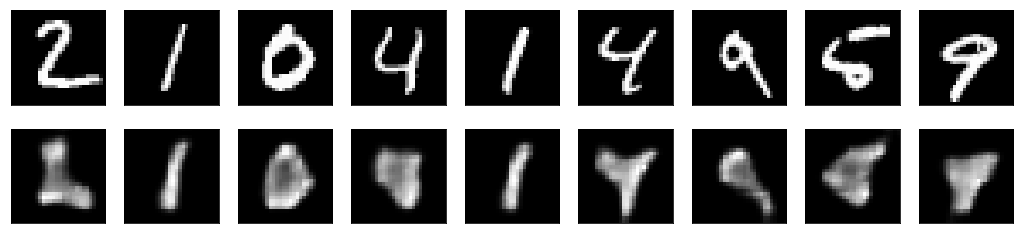

In [2]:
%matplotlib inline

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
import cv2

murky_img = cv2.imread("murky.jpg")

print(murky_img.shape)
murky_gray = cv2.cvtColor(murky_img,cv2.COLOR_BGR2GRAY)

murky_img_resized = cv2.resize(murky_gray,(28,28))

result = autoencoder.predict([x_test])

(200, 200, 3)


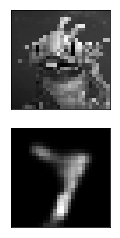

In [12]:
plt.figure(figsize=(2, 4))

# display original
ax = plt.subplot(2, 1, 1)
plt.imshow(murky_img_resized.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# display reconstruction
ax = plt.subplot(2, 1, 2)
plt.imshow(result[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

# Busque conhecimento
###### https://github.com/nate-parrott/juypter-notebooks/blob/master/dream.ipynb